# GAN

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

Using cuda device


In [2]:
BATCH_SIZE = 64
Z_DIM = 10
HIDDEN_DIM = 64
NB_EPOCHS = 30

## Models architectures

In [3]:
class Discriminator(nn.Module):

    def __init__(self, image_channels=1):
        super().__init__()
        kernel_size = 4
        stride = 2
        self.dicriminate = nn.Sequential(
            # input size: input_channels x 28 x 28
            nn.Conv2d(image_channels, HIDDEN_DIM, kernel_size, stride),
            nn.BatchNorm2d(HIDDEN_DIM),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: HIDDEN_DIM x 13 x 13
            nn.Conv2d(HIDDEN_DIM, HIDDEN_DIM*2, kernel_size, stride),
            nn.BatchNorm2d(HIDDEN_DIM*2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size: HIDDEN_DIM*2 x 5 x 5
            nn.Conv2d(HIDDEN_DIM*2, 1, kernel_size, stride),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.dicriminate(x)


class Generator(nn.Module):

    def __init__(self, image_channels=1):
        super().__init__()
        self.generate = nn.Sequential(
            # input size: Z_DIM
            nn.ConvTranspose2d(Z_DIM, HIDDEN_DIM*4, kernel_size=3, stride=2),
            nn.BatchNorm2d(HIDDEN_DIM*4),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM*4 x 3 x 3
            nn.ConvTranspose2d(HIDDEN_DIM*4, HIDDEN_DIM*2, kernel_size=4, stride=1),
            nn.BatchNorm2d(HIDDEN_DIM*2),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM*2 x 6 x 6
            nn.ConvTranspose2d(HIDDEN_DIM*2, HIDDEN_DIM, kernel_size=3, stride=2),
            nn.BatchNorm2d(HIDDEN_DIM),
            nn.ReLU(inplace=True),
            # state dim: HIDDEN_DIM x 13 x 13
            nn.ConvTranspose2d(HIDDEN_DIM, image_channels, kernel_size=4, stride=2),
            # state dim: 28 x 28
            nn.Tanh()
        )

    def forward(self, x):
        return self.generate(x)

# disc = Discriminator()
# x0 = train_data[0][0].view(1, 1, 28, 28)
# disc(x0).shape

# gen = Generator()
# x0 = torch.randn(1,10,1,1)
# gen(x0).shape

## Load data (MNIST)

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

train_data = datasets.MNIST(
    root='../data',
    train=True,
    transform=transform
)

test_data = datasets.MNIST(
    root='../data',
    train=False,
    transform=transform
)

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

/d/alecoz/miniconda3/envs/alc/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /home/conda/feedstock_root/build_artifacts/pytorch-recipe_1635068699003/work/torch/csrc/utils/tensor_numpy.cpp:189.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Initialize

In [5]:
# Models
generator = Generator().to(device)
discriminator = Discriminator().to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizers
optim_generator = torch.optim.Adam(generator.parameters(), lr=0.0002)
optim_discriminator = torch.optim.Adam(discriminator.parameters())

# Fixed noise used to visualize the progression of the generator
fixed_noise = torch.randn(16, Z_DIM, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

## Train

Epoch [1/30] ------------------
[1/30][0/938]	 Loss D: 1.458	 Loss G: 1.864	 D(x): 0.49	 D(G(z)): 0.51/0.17
[1/30][100/938]	 Loss D: 0.071	 Loss G: 5.221	 D(x): 0.97	 D(G(z)): 0.03/0.01
[1/30][200/938]	 Loss D: 0.057	 Loss G: 5.245	 D(x): 0.97	 D(G(z)): 0.02/0.01
[1/30][300/938]	 Loss D: 0.033	 Loss G: 6.064	 D(x): 0.98	 D(G(z)): 0.01/0.00
[1/30][400/938]	 Loss D: 0.007	 Loss G: 6.592	 D(x): 1.00	 D(G(z)): 0.01/0.00
[1/30][500/938]	 Loss D: 0.006	 Loss G: 6.080	 D(x): 1.00	 D(G(z)): 0.01/0.00
[1/30][600/938]	 Loss D: 0.005	 Loss G: 7.227	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][700/938]	 Loss D: 0.002	 Loss G: 6.935	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][800/938]	 Loss D: 0.003	 Loss G: 6.906	 D(x): 1.00	 D(G(z)): 0.00/0.00
[1/30][900/938]	 Loss D: 0.002	 Loss G: 7.322	 D(x): 1.00	 D(G(z)): 0.00/0.00


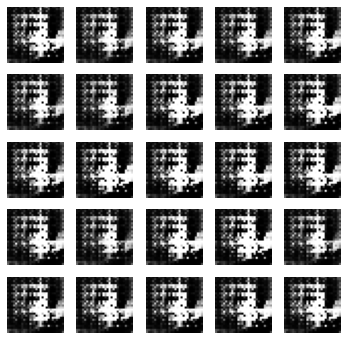

Epoch [2/30] ------------------
[2/30][0/938]	 Loss D: 0.009	 Loss G: 5.894	 D(x): 1.00	 D(G(z)): 0.01/0.00
[2/30][100/938]	 Loss D: 0.004	 Loss G: 6.696	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][200/938]	 Loss D: 0.005	 Loss G: 8.819	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][300/938]	 Loss D: 0.074	 Loss G: 7.030	 D(x): 0.94	 D(G(z)): 0.00/0.00
[2/30][400/938]	 Loss D: 0.016	 Loss G: 7.711	 D(x): 0.99	 D(G(z)): 0.00/0.00
[2/30][500/938]	 Loss D: 0.008	 Loss G: 7.955	 D(x): 1.00	 D(G(z)): 0.00/0.00
[2/30][600/938]	 Loss D: 0.034	 Loss G: 8.124	 D(x): 1.00	 D(G(z)): 0.03/0.00
[2/30][700/938]	 Loss D: 0.042	 Loss G: 10.079	 D(x): 0.98	 D(G(z)): 0.02/0.00
[2/30][800/938]	 Loss D: 0.077	 Loss G: 6.011	 D(x): 0.97	 D(G(z)): 0.03/0.01
[2/30][900/938]	 Loss D: 0.052	 Loss G: 5.012	 D(x): 0.98	 D(G(z)): 0.03/0.02


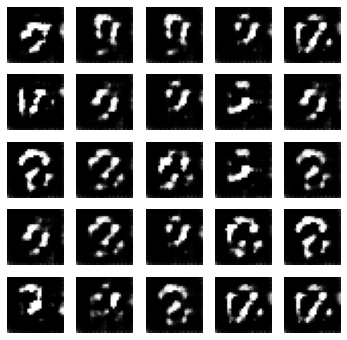

Epoch [3/30] ------------------
[3/30][0/938]	 Loss D: 0.072	 Loss G: 6.094	 D(x): 0.95	 D(G(z)): 0.02/0.01
[3/30][100/938]	 Loss D: 0.048	 Loss G: 5.809	 D(x): 0.98	 D(G(z)): 0.02/0.01
[3/30][200/938]	 Loss D: 0.305	 Loss G: 3.817	 D(x): 0.97	 D(G(z)): 0.19/0.06
[3/30][300/938]	 Loss D: 0.215	 Loss G: 4.135	 D(x): 0.94	 D(G(z)): 0.06/0.05
[3/30][400/938]	 Loss D: 0.140	 Loss G: 6.369	 D(x): 0.96	 D(G(z)): 0.02/0.02
[3/30][500/938]	 Loss D: 0.137	 Loss G: 5.295	 D(x): 0.93	 D(G(z)): 0.04/0.02
[3/30][600/938]	 Loss D: 0.102	 Loss G: 3.899	 D(x): 0.99	 D(G(z)): 0.08/0.04
[3/30][700/938]	 Loss D: 0.191	 Loss G: 3.908	 D(x): 0.93	 D(G(z)): 0.07/0.06
[3/30][800/938]	 Loss D: 0.125	 Loss G: 4.386	 D(x): 0.96	 D(G(z)): 0.07/0.05
[3/30][900/938]	 Loss D: 0.077	 Loss G: 6.839	 D(x): 0.95	 D(G(z)): 0.02/0.01


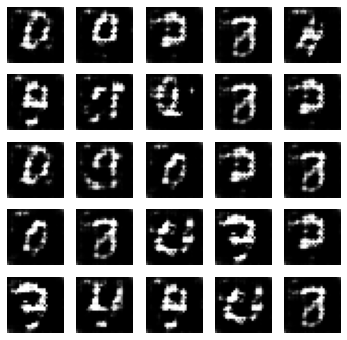

Epoch [4/30] ------------------
[4/30][0/938]	 Loss D: 0.357	 Loss G: 4.233	 D(x): 0.99	 D(G(z)): 0.19/0.09
[4/30][100/938]	 Loss D: 0.519	 Loss G: 3.798	 D(x): 0.83	 D(G(z)): 0.06/0.07
[4/30][200/938]	 Loss D: 0.655	 Loss G: 5.940	 D(x): 0.74	 D(G(z)): 0.03/0.03
[4/30][300/938]	 Loss D: 0.122	 Loss G: 4.595	 D(x): 0.96	 D(G(z)): 0.05/0.05
[4/30][400/938]	 Loss D: 0.468	 Loss G: 3.005	 D(x): 0.80	 D(G(z)): 0.10/0.11
[4/30][500/938]	 Loss D: 0.660	 Loss G: 2.870	 D(x): 0.88	 D(G(z)): 0.26/0.16
[4/30][600/938]	 Loss D: 0.181	 Loss G: 5.060	 D(x): 0.94	 D(G(z)): 0.08/0.02
[4/30][700/938]	 Loss D: 0.182	 Loss G: 5.463	 D(x): 0.98	 D(G(z)): 0.09/0.05
[4/30][800/938]	 Loss D: 0.285	 Loss G: 4.486	 D(x): 0.86	 D(G(z)): 0.05/0.04
[4/30][900/938]	 Loss D: 0.840	 Loss G: 2.351	 D(x): 0.94	 D(G(z)): 0.42/0.19


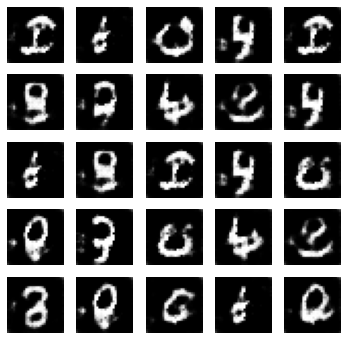

Epoch [5/30] ------------------
[5/30][0/938]	 Loss D: 0.483	 Loss G: 5.300	 D(x): 0.88	 D(G(z)): 0.12/0.05
[5/30][100/938]	 Loss D: 0.391	 Loss G: 4.507	 D(x): 0.83	 D(G(z)): 0.09/0.07
[5/30][200/938]	 Loss D: 0.349	 Loss G: 3.972	 D(x): 0.87	 D(G(z)): 0.08/0.06
[5/30][300/938]	 Loss D: 0.684	 Loss G: 3.021	 D(x): 0.90	 D(G(z)): 0.30/0.13
[5/30][400/938]	 Loss D: 0.399	 Loss G: 4.244	 D(x): 0.88	 D(G(z)): 0.10/0.06
[5/30][500/938]	 Loss D: 0.565	 Loss G: 2.650	 D(x): 0.86	 D(G(z)): 0.21/0.18
[5/30][600/938]	 Loss D: 0.575	 Loss G: 4.399	 D(x): 0.78	 D(G(z)): 0.07/0.06
[5/30][700/938]	 Loss D: 0.371	 Loss G: 4.349	 D(x): 0.85	 D(G(z)): 0.11/0.07
[5/30][800/938]	 Loss D: 0.194	 Loss G: 4.541	 D(x): 0.93	 D(G(z)): 0.07/0.05
[5/30][900/938]	 Loss D: 0.615	 Loss G: 4.346	 D(x): 0.75	 D(G(z)): 0.13/0.09


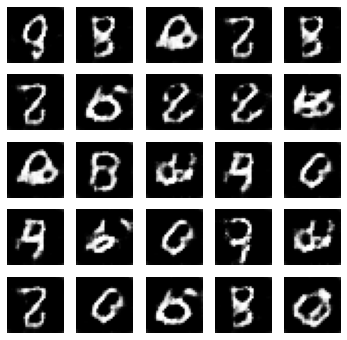

Epoch [6/30] ------------------
[6/30][0/938]	 Loss D: 0.566	 Loss G: 2.736	 D(x): 0.84	 D(G(z)): 0.22/0.16
[6/30][100/938]	 Loss D: 0.604	 Loss G: 3.081	 D(x): 0.71	 D(G(z)): 0.11/0.10
[6/30][200/938]	 Loss D: 0.528	 Loss G: 2.657	 D(x): 0.86	 D(G(z)): 0.19/0.18
[6/30][300/938]	 Loss D: 0.906	 Loss G: 2.396	 D(x): 0.79	 D(G(z)): 0.31/0.21
[6/30][400/938]	 Loss D: 0.479	 Loss G: 2.694	 D(x): 0.85	 D(G(z)): 0.15/0.17
[6/30][500/938]	 Loss D: 0.412	 Loss G: 4.008	 D(x): 0.85	 D(G(z)): 0.11/0.09
[6/30][600/938]	 Loss D: 0.647	 Loss G: 2.292	 D(x): 0.89	 D(G(z)): 0.30/0.20
[6/30][700/938]	 Loss D: 0.562	 Loss G: 3.179	 D(x): 0.79	 D(G(z)): 0.18/0.11
[6/30][800/938]	 Loss D: 0.629	 Loss G: 2.758	 D(x): 0.77	 D(G(z)): 0.17/0.16
[6/30][900/938]	 Loss D: 0.727	 Loss G: 3.689	 D(x): 0.71	 D(G(z)): 0.09/0.07


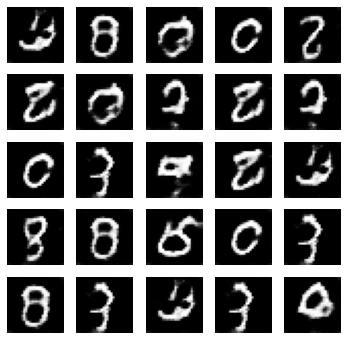

Epoch [7/30] ------------------
[7/30][0/938]	 Loss D: 1.092	 Loss G: 1.627	 D(x): 0.68	 D(G(z)): 0.37/0.30
[7/30][100/938]	 Loss D: 1.702	 Loss G: 1.199	 D(x): 0.75	 D(G(z)): 0.59/0.43
[7/30][200/938]	 Loss D: 0.292	 Loss G: 2.601	 D(x): 0.93	 D(G(z)): 0.17/0.12
[7/30][300/938]	 Loss D: 0.634	 Loss G: 3.064	 D(x): 0.73	 D(G(z)): 0.13/0.10
[7/30][400/938]	 Loss D: 0.902	 Loss G: 1.569	 D(x): 0.78	 D(G(z)): 0.35/0.31
[7/30][500/938]	 Loss D: 0.349	 Loss G: 2.664	 D(x): 0.93	 D(G(z)): 0.20/0.14
[7/30][600/938]	 Loss D: 0.473	 Loss G: 3.245	 D(x): 0.89	 D(G(z)): 0.22/0.13
[7/30][700/938]	 Loss D: 1.265	 Loss G: 1.951	 D(x): 0.64	 D(G(z)): 0.36/0.26
[7/30][800/938]	 Loss D: 0.564	 Loss G: 3.273	 D(x): 0.75	 D(G(z)): 0.13/0.12
[7/30][900/938]	 Loss D: 0.896	 Loss G: 1.846	 D(x): 0.75	 D(G(z)): 0.29/0.28


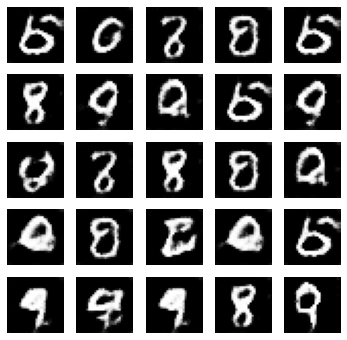

Epoch [8/30] ------------------
[8/30][0/938]	 Loss D: 0.730	 Loss G: 2.049	 D(x): 0.70	 D(G(z)): 0.20/0.22
[8/30][100/938]	 Loss D: 1.030	 Loss G: 2.116	 D(x): 0.64	 D(G(z)): 0.24/0.21
[8/30][200/938]	 Loss D: 0.730	 Loss G: 2.395	 D(x): 0.78	 D(G(z)): 0.24/0.17
[8/30][300/938]	 Loss D: 1.303	 Loss G: 2.316	 D(x): 0.57	 D(G(z)): 0.21/0.20
[8/30][400/938]	 Loss D: 0.492	 Loss G: 3.019	 D(x): 0.83	 D(G(z)): 0.17/0.14
[8/30][500/938]	 Loss D: 0.850	 Loss G: 2.203	 D(x): 0.71	 D(G(z)): 0.26/0.24
[8/30][600/938]	 Loss D: 0.668	 Loss G: 2.397	 D(x): 0.76	 D(G(z)): 0.21/0.18
[8/30][700/938]	 Loss D: 0.886	 Loss G: 1.974	 D(x): 0.83	 D(G(z)): 0.36/0.24
[8/30][800/938]	 Loss D: 0.780	 Loss G: 1.836	 D(x): 0.74	 D(G(z)): 0.27/0.24
[8/30][900/938]	 Loss D: 0.910	 Loss G: 1.924	 D(x): 0.78	 D(G(z)): 0.37/0.24


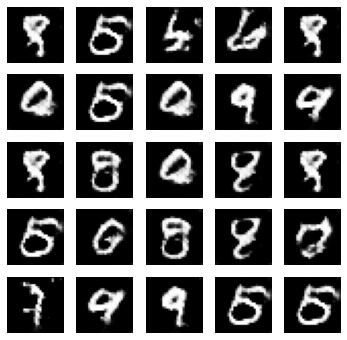

Epoch [9/30] ------------------
[9/30][0/938]	 Loss D: 1.120	 Loss G: 1.717	 D(x): 0.68	 D(G(z)): 0.30/0.31
[9/30][100/938]	 Loss D: 1.298	 Loss G: 1.456	 D(x): 0.83	 D(G(z)): 0.49/0.39
[9/30][200/938]	 Loss D: 0.895	 Loss G: 1.811	 D(x): 0.70	 D(G(z)): 0.27/0.25
[9/30][300/938]	 Loss D: 0.691	 Loss G: 1.878	 D(x): 0.79	 D(G(z)): 0.26/0.24
[9/30][400/938]	 Loss D: 0.918	 Loss G: 1.768	 D(x): 0.70	 D(G(z)): 0.27/0.28
[9/30][500/938]	 Loss D: 1.076	 Loss G: 1.771	 D(x): 0.63	 D(G(z)): 0.30/0.27
[9/30][600/938]	 Loss D: 0.634	 Loss G: 2.424	 D(x): 0.74	 D(G(z)): 0.19/0.16
[9/30][700/938]	 Loss D: 0.561	 Loss G: 2.932	 D(x): 0.82	 D(G(z)): 0.19/0.15
[9/30][800/938]	 Loss D: 0.551	 Loss G: 2.271	 D(x): 0.86	 D(G(z)): 0.24/0.16
[9/30][900/938]	 Loss D: 0.791	 Loss G: 2.343	 D(x): 0.69	 D(G(z)): 0.21/0.20


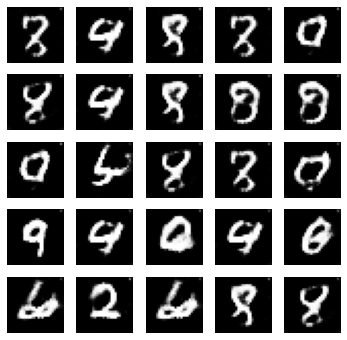

Epoch [10/30] ------------------
[10/30][0/938]	 Loss D: 0.823	 Loss G: 1.976	 D(x): 0.69	 D(G(z)): 0.23/0.24
[10/30][100/938]	 Loss D: 0.692	 Loss G: 1.777	 D(x): 0.86	 D(G(z)): 0.33/0.27
[10/30][200/938]	 Loss D: 0.475	 Loss G: 3.174	 D(x): 0.76	 D(G(z)): 0.10/0.07
[10/30][300/938]	 Loss D: 1.232	 Loss G: 1.406	 D(x): 0.80	 D(G(z)): 0.48/0.36
[10/30][400/938]	 Loss D: 0.686	 Loss G: 2.792	 D(x): 0.79	 D(G(z)): 0.21/0.15
[10/30][500/938]	 Loss D: 1.093	 Loss G: 1.823	 D(x): 0.87	 D(G(z)): 0.46/0.27
[10/30][600/938]	 Loss D: 0.881	 Loss G: 1.581	 D(x): 0.70	 D(G(z)): 0.29/0.33
[10/30][700/938]	 Loss D: 1.337	 Loss G: 1.769	 D(x): 0.74	 D(G(z)): 0.43/0.32
[10/30][800/938]	 Loss D: 1.071	 Loss G: 2.202	 D(x): 0.65	 D(G(z)): 0.26/0.24
[10/30][900/938]	 Loss D: 0.423	 Loss G: 3.283	 D(x): 0.81	 D(G(z)): 0.11/0.08


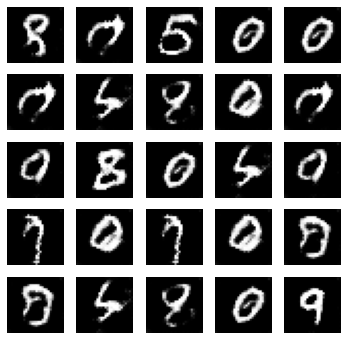

Epoch [11/30] ------------------
[11/30][0/938]	 Loss D: 0.684	 Loss G: 2.052	 D(x): 0.87	 D(G(z)): 0.30/0.26
[11/30][100/938]	 Loss D: 1.009	 Loss G: 2.215	 D(x): 0.63	 D(G(z)): 0.25/0.22
[11/30][200/938]	 Loss D: 0.869	 Loss G: 1.787	 D(x): 0.77	 D(G(z)): 0.37/0.25
[11/30][300/938]	 Loss D: 0.720	 Loss G: 2.372	 D(x): 0.74	 D(G(z)): 0.23/0.17
[11/30][400/938]	 Loss D: 0.652	 Loss G: 2.551	 D(x): 0.72	 D(G(z)): 0.15/0.16
[11/30][500/938]	 Loss D: 1.149	 Loss G: 1.311	 D(x): 0.72	 D(G(z)): 0.42/0.39
[11/30][600/938]	 Loss D: 1.110	 Loss G: 2.275	 D(x): 0.71	 D(G(z)): 0.33/0.22
[11/30][700/938]	 Loss D: 0.853	 Loss G: 1.714	 D(x): 0.87	 D(G(z)): 0.42/0.27
[11/30][800/938]	 Loss D: 0.622	 Loss G: 1.946	 D(x): 0.84	 D(G(z)): 0.28/0.23
[11/30][900/938]	 Loss D: 0.675	 Loss G: 2.182	 D(x): 0.83	 D(G(z)): 0.28/0.20


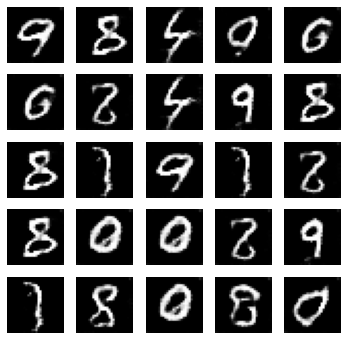

Epoch [12/30] ------------------
[12/30][0/938]	 Loss D: 0.617	 Loss G: 1.774	 D(x): 0.86	 D(G(z)): 0.29/0.26
[12/30][100/938]	 Loss D: 1.003	 Loss G: 1.493	 D(x): 0.72	 D(G(z)): 0.37/0.33
[12/30][200/938]	 Loss D: 1.174	 Loss G: 1.384	 D(x): 0.63	 D(G(z)): 0.38/0.34
[12/30][300/938]	 Loss D: 0.728	 Loss G: 1.842	 D(x): 0.80	 D(G(z)): 0.30/0.26
[12/30][400/938]	 Loss D: 1.213	 Loss G: 1.923	 D(x): 0.54	 D(G(z)): 0.26/0.23
[12/30][500/938]	 Loss D: 0.939	 Loss G: 1.543	 D(x): 0.72	 D(G(z)): 0.35/0.32
[12/30][600/938]	 Loss D: 0.780	 Loss G: 1.760	 D(x): 0.76	 D(G(z)): 0.29/0.29
[12/30][700/938]	 Loss D: 0.761	 Loss G: 2.467	 D(x): 0.71	 D(G(z)): 0.23/0.16
[12/30][800/938]	 Loss D: 1.282	 Loss G: 1.263	 D(x): 0.67	 D(G(z)): 0.47/0.40
[12/30][900/938]	 Loss D: 0.660	 Loss G: 2.397	 D(x): 0.79	 D(G(z)): 0.20/0.19


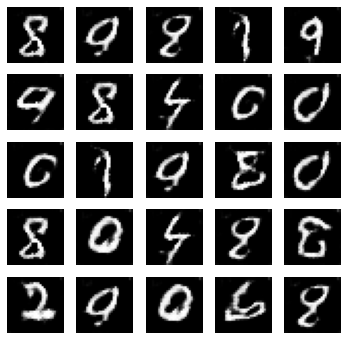

Epoch [13/30] ------------------
[13/30][0/938]	 Loss D: 1.011	 Loss G: 1.677	 D(x): 0.63	 D(G(z)): 0.29/0.29
[13/30][100/938]	 Loss D: 0.655	 Loss G: 2.053	 D(x): 0.79	 D(G(z)): 0.24/0.22
[13/30][200/938]	 Loss D: 0.751	 Loss G: 1.663	 D(x): 0.76	 D(G(z)): 0.29/0.27
[13/30][300/938]	 Loss D: 0.921	 Loss G: 1.398	 D(x): 0.73	 D(G(z)): 0.35/0.34
[13/30][400/938]	 Loss D: 0.688	 Loss G: 1.960	 D(x): 0.71	 D(G(z)): 0.23/0.19
[13/30][500/938]	 Loss D: 0.778	 Loss G: 2.205	 D(x): 0.66	 D(G(z)): 0.17/0.15
[13/30][600/938]	 Loss D: 0.786	 Loss G: 2.587	 D(x): 0.78	 D(G(z)): 0.27/0.20
[13/30][700/938]	 Loss D: 0.888	 Loss G: 1.761	 D(x): 0.73	 D(G(z)): 0.32/0.26
[13/30][800/938]	 Loss D: 1.018	 Loss G: 2.197	 D(x): 0.61	 D(G(z)): 0.25/0.21
[13/30][900/938]	 Loss D: 1.088	 Loss G: 1.893	 D(x): 0.56	 D(G(z)): 0.24/0.24


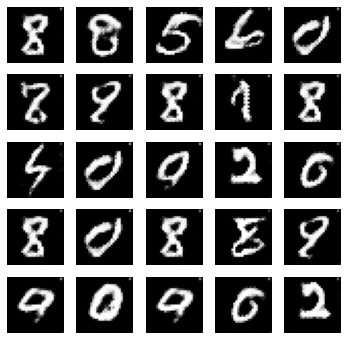

Epoch [14/30] ------------------
[14/30][0/938]	 Loss D: 1.136	 Loss G: 1.605	 D(x): 0.59	 D(G(z)): 0.31/0.28
[14/30][100/938]	 Loss D: 1.003	 Loss G: 1.846	 D(x): 0.64	 D(G(z)): 0.23/0.24
[14/30][200/938]	 Loss D: 1.445	 Loss G: 1.510	 D(x): 0.52	 D(G(z)): 0.36/0.31
[14/30][300/938]	 Loss D: 0.671	 Loss G: 1.743	 D(x): 0.77	 D(G(z)): 0.26/0.25
[14/30][400/938]	 Loss D: 1.287	 Loss G: 1.178	 D(x): 0.71	 D(G(z)): 0.49/0.39
[14/30][500/938]	 Loss D: 0.888	 Loss G: 1.665	 D(x): 0.76	 D(G(z)): 0.34/0.29
[14/30][600/938]	 Loss D: 1.179	 Loss G: 1.242	 D(x): 0.78	 D(G(z)): 0.48/0.38
[14/30][700/938]	 Loss D: 0.817	 Loss G: 1.561	 D(x): 0.74	 D(G(z)): 0.31/0.28
[14/30][800/938]	 Loss D: 0.950	 Loss G: 1.552	 D(x): 0.67	 D(G(z)): 0.32/0.29
[14/30][900/938]	 Loss D: 0.707	 Loss G: 1.774	 D(x): 0.70	 D(G(z)): 0.23/0.21


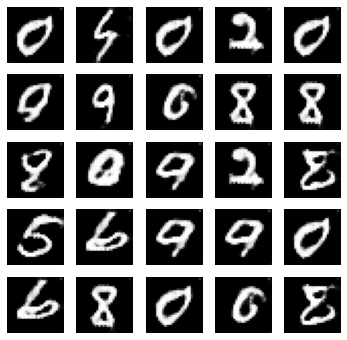

Epoch [15/30] ------------------
[15/30][0/938]	 Loss D: 0.952	 Loss G: 1.440	 D(x): 0.67	 D(G(z)): 0.34/0.33
[15/30][100/938]	 Loss D: 1.389	 Loss G: 1.013	 D(x): 0.73	 D(G(z)): 0.56/0.43
[15/30][200/938]	 Loss D: 1.212	 Loss G: 1.426	 D(x): 0.62	 D(G(z)): 0.35/0.34
[15/30][300/938]	 Loss D: 1.314	 Loss G: 1.401	 D(x): 0.67	 D(G(z)): 0.43/0.36
[15/30][400/938]	 Loss D: 0.761	 Loss G: 2.029	 D(x): 0.77	 D(G(z)): 0.27/0.23
[15/30][500/938]	 Loss D: 1.141	 Loss G: 1.583	 D(x): 0.62	 D(G(z)): 0.32/0.29
[15/30][600/938]	 Loss D: 1.021	 Loss G: 1.689	 D(x): 0.71	 D(G(z)): 0.34/0.30
[15/30][700/938]	 Loss D: 1.154	 Loss G: 1.746	 D(x): 0.58	 D(G(z)): 0.28/0.26
[15/30][800/938]	 Loss D: 1.011	 Loss G: 1.569	 D(x): 0.61	 D(G(z)): 0.26/0.31
[15/30][900/938]	 Loss D: 1.180	 Loss G: 1.118	 D(x): 0.76	 D(G(z)): 0.47/0.44


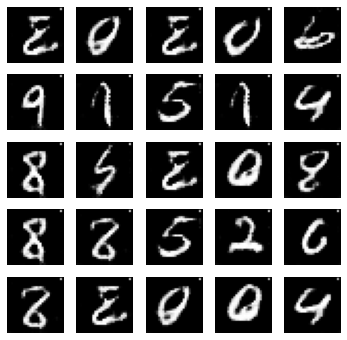

Epoch [16/30] ------------------
[16/30][0/938]	 Loss D: 0.938	 Loss G: 1.638	 D(x): 0.74	 D(G(z)): 0.37/0.28
[16/30][100/938]	 Loss D: 1.401	 Loss G: 1.259	 D(x): 0.69	 D(G(z)): 0.49/0.39
[16/30][200/938]	 Loss D: 0.734	 Loss G: 1.608	 D(x): 0.81	 D(G(z)): 0.33/0.28


KeyboardInterrupt: 

In [6]:
losses_discriminator = []
losses_generator = []

for epoch in range(NB_EPOCHS):
    print(f'Epoch [{epoch+1}/{NB_EPOCHS}] ------------------')
    for batch_idx, data in enumerate(train_dataloader):

        # Generate batch of fake images from noise
        noise = torch.randn(BATCH_SIZE, Z_DIM, 1, 1, device=device)
        fake_images = generator(noise)

        ### DISCRIMINATOR ###

        # Discriminate fake images
        output_0 = discriminator(fake_images.detach()).view(-1)
        discriminator_labels_fake = torch.full_like(output_0, fill_value=fake_label, device=device) # output should be 0 (fake)
        loss_discriminator_fake = criterion(output_0, discriminator_labels_fake)
        # Brackpropagation for discriminator on fake images
        optim_discriminator.zero_grad()
        loss_discriminator_fake.backward()

        # Discriminate real images
        real_images = data[0].to(device)
        output_1 = discriminator(real_images).view(-1)
        discriminator_labels_real = torch.full_like(output_1, fill_value=real_label) # output should be 1 (real)
        loss_discriminator_real = criterion(output_1, discriminator_labels_real)
        # Brackpropagation for discriminator on real images
        loss_discriminator_real.backward() # don't set gradients to zero, accumulate with previous ones

        # Update discriminator
        optim_discriminator.step()


        ### GENERATOR ###

        output_2 = discriminator(fake_images).view(-1)
        generator_labels = torch.full_like(output_2, fill_value=real_label, device=device) # output should be 1 (discriminated as real)
        loss_generator = criterion(output_2, generator_labels)

        # Backpropagation
        optim_generator.zero_grad()
        loss_generator.backward()

        # Update generator
        optim_generator.step()


        ### LOG AND DISPLAY ###
        
        losses_discriminator.append(loss_discriminator_fake.item()+loss_discriminator_real.item())
        losses_generator.append(loss_generator.item())

        if (batch_idx % 100 == 0):
            print('[{}/{}][{}/{}]\t Loss D: {:.3f}\t Loss G: {:.3f}\t D(x): {:.2f}\t D(G(z)): {:.2f}/{:.2f}'.format(epoch+1, NB_EPOCHS, batch_idx, len(train_dataloader),
            losses_discriminator[-1], losses_generator[-1], output_1.mean().item(), output_0.mean().item(), output_2.mean().item()))

    # Plot generated samples
    imgs = generator(fixed_noise).detach().cpu().numpy()
    fig = plt.figure(figsize=(6, 6))
    rows, cols = 5, 5
    for i in range(1, rows*cols+1):
        sample_idx = torch.randint(len(imgs), size=(1,)).item()
        img = imgs[sample_idx]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()
